## Задание №1

Построить график изменения количества имен Ruth и Robert с 1900 по 2000.

In [1]:
import os
import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATA_PATH = f'{os.getcwd()}/names/'

Получаем перечень dataframe за 1900-2000 года:

In [3]:
names_by_year = {}
for year in range(1900, 2001):
    names_by_year[year] = pd.read_csv(DATA_PATH + 'yob{}.txt'.format(year),
                                      header=None,
                                      names = ['Name', 'Gender', 'Count'])
names_all = pd.concat(names_by_year, names=['Year', 'Pos'], axis=0)

Группируем по годам и именам, суммируем имена мальчиков и девочек.
Выбираем два нужных имени, транспонируем и рисуем.

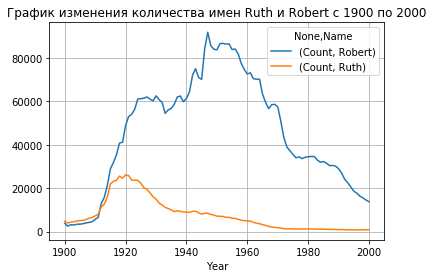

In [4]:
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot(
    title='График изменения количества имен Ruth и Robert с 1900 по 2000',
    grid=True)

## Задание №2

Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).

In [5]:
names_by_year = {}
for year in range(1900, 2001, 5):
    names_by_year[year] = pd.read_csv(DATA_PATH + 'yob{}.txt'.format(year),
                                      header=None,
                                      names = ['Name', 'Gender', 'Count'])
names_all = pd.concat(names_by_year, names=['Year', 'Pos'], axis=0)

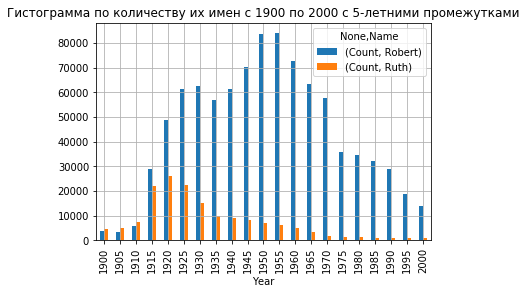

In [6]:
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot.bar(
    title='Гистограмма по количеству их имен с 1900 по 2000 с 5-летними промежутками',
    grid=1)

## Задание №3

Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.

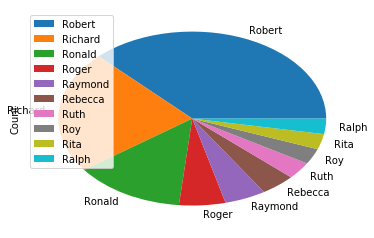

In [7]:
names_for_pie = pd.read_csv(DATA_PATH + 'yob{}.txt'.format(1950), header=None, names = ['Name', 'Gender', 'Count'])
names_for_pie_r = names_for_pie[names_for_pie.Name.str.startswith('R')]
names_for_pie_r.groupby('Name').sum().sort_values(by = 'Count', ascending=False).head(10).plot.pie(y='Count')

## Задание №4

Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет.

Copy-paste из Задания №1 (за 100 лет группируем по годам и именам, суммируем имена мальчиков и девочек):

In [8]:
names_by_year = {}
for year in range(1900, 2001):
    names_by_year[year] = pd.read_csv(DATA_PATH + 'yob{}.txt'.format(year),
                                      header=None,
                                      names = ['Name', 'Gender', 'Count'])
names_all = pd.concat(names_by_year, names=['Year', 'Pos'], axis=0)
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()

Считаем частоту употребления имен за все 100 лет:

In [9]:
names_for_consonants = name_dynamics.groupby('Name').sum().reset_index()

Добавляем столбец с количеством согласных в каждом имени и рисуем точечную диаграмму - зависимость частоты употребления имен за 100 лет от количества согласных в имени:

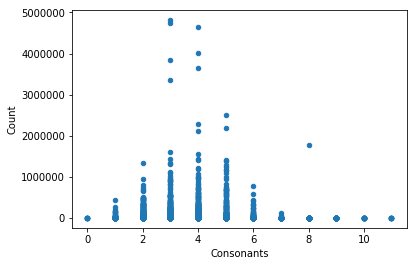

In [10]:
def count_consonants(row):
    count = 0
    for i in range(0, len(row.Name)):
        if row.Name[i].lower() not in ['a', 'e', 'i', 'o', 'u']:
            count += 1
    return count

names_for_consonants['Consonants'] = names_for_consonants.apply(lambda row: count_consonants(row), axis=1)
names_for_consonants.plot.scatter(x='Consonants', y='Count')